# 🎯 Customer Churn Prediction – Machine Learning Project

## 📌 Problem Statement

Customer churn prediction is a critical task in the business and telecom industry.  
This project aims to build a machine learning model that can predict whether a customer is likely to leave the company (churn) based on their demographic, service, and billing information.

By identifying customers who are at risk of leaving, companies can take proactive steps to improve customer satisfaction and retention.

---

### 🧠 Problem Type: Classification  
### 🎯 Target Variable: **Churn (Yes / No)**  
### ⚙️ Approach: Supervised Machine Learning

---

## 1. Data Loading

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/Telco_Customer_Churn.csv")

In [131]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2. Exploratory Data Analysis (EDA)

### Churn Distribution

In [133]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### Churn Ratio Visualization

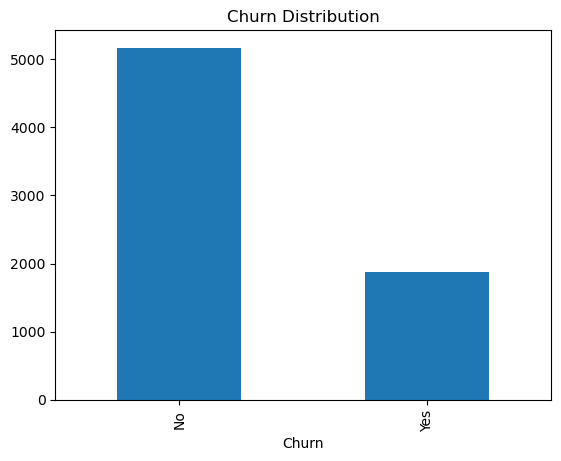

In [134]:
import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.show()

### Tenure vs Churn

In [135]:
df.groupby("Churn")["tenure"].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

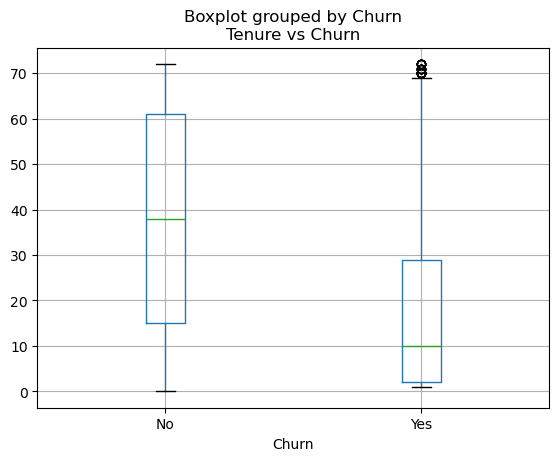

In [136]:
df.boxplot(column="tenure", by="Churn")
plt.title("Tenure vs Churn")
plt.show()

### MonthlyCharges vs Churn

In [137]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

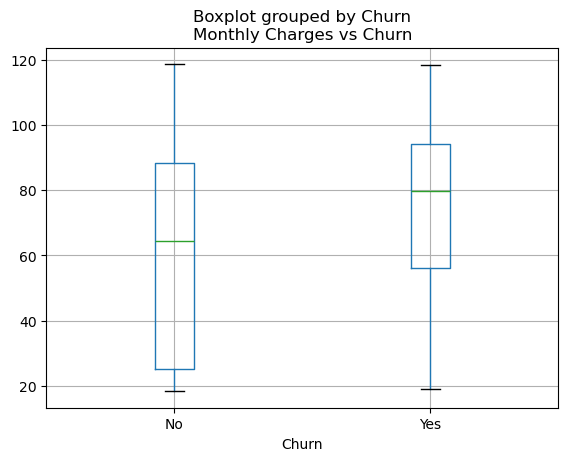

In [138]:
df.boxplot(column="MonthlyCharges", by="Churn")
plt.title("Monthly Charges vs Churn")
plt.show()

### Contract Type vs Churn

In [139]:
pd.crosstab(df["Contract"], df["Churn"])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


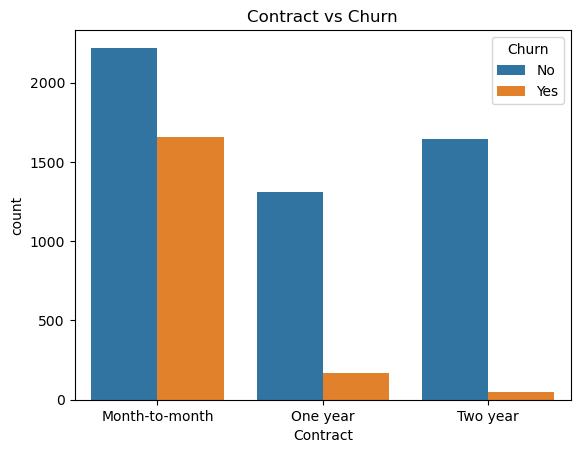

In [140]:
import seaborn as sns

sns.countplot(x="Contract", hue="Churn", data=pd.read_csv("data/Telco_Customer_Churn.csv"))
plt.title("Contract vs Churn")
plt.show()

### Internet Service vs Churn

In [141]:
pd.crosstab(df["InternetService"], df["Churn"])

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


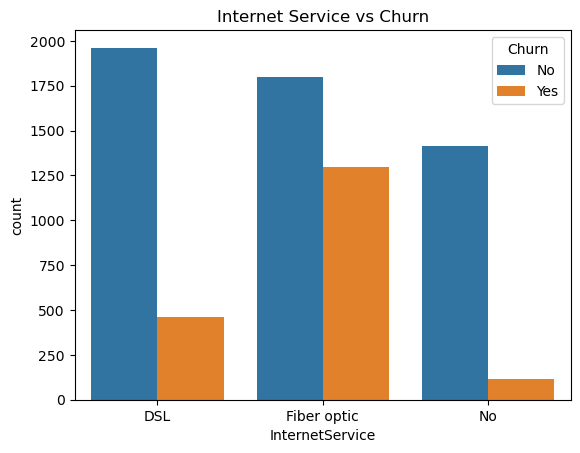

In [142]:
import seaborn as sns

sns.countplot(x="InternetService", hue="Churn", data=pd.read_csv("data/Telco_Customer_Churn.csv"))
plt.title("Internet Service vs Churn")
plt.show()

## 3. Data Cleaning & Preprocessing

In [143]:
import pandas as pd

df = pd.read_csv("data/Telco_Customer_Churn.csv")

### Unnecessary Column Drop

In [144]:
df.drop("customerID", axis=1, inplace=True)

### Data Type Fix

In [145]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

### Missing Value Handle

In [146]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [147]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

### Target Column Encode

In [148]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

### Categorical Features Encode

In [149]:
df = pd.get_dummies(df, drop_first=True)

In [150]:
df.shape

(7043, 31)

In [151]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


## 4. Data Preparation + Imbalance Fix

### Feature & Target

In [152]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

### Train-Test Split

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### SMOTE Apply (Only on Training Data)

In [154]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

### New Class Distribution Check

In [155]:
y_train_res.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

### Feature Scaling

In [156]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

## 5. Model Training

### Logistic Regression Train

In [157]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_res, y_train_res)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Prediction

In [158]:
y_pred_log = log_model.predict(X_test)

### Evaluation

In [159]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

[[866 170]
 [115 258]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1036
           1       0.60      0.69      0.64       373

    accuracy                           0.80      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.81      0.80      0.80      1409



### Random Forest Train

In [160]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_res, y_train_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Prediction + Evaluation

In [161]:
y_pred_rf = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[892 144]
 [158 215]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1036
           1       0.60      0.58      0.59       373

    accuracy                           0.79      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.79      0.78      1409



### Gradient Boosting Train

In [162]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


### Prediction + Evaluation

In [163]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix

y_pred_gb = gb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

[[563 473]
 [ 63 310]]
              precision    recall  f1-score   support

           0       0.90      0.54      0.68      1036
           1       0.40      0.83      0.54       373

    accuracy                           0.62      1409
   macro avg       0.65      0.69      0.61      1409
weighted avg       0.77      0.62      0.64      1409



### XGBoost Train

In [164]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=3,   # imbalance handle
    random_state=42
)

xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


### Prediction + Evaluation

In [165]:
y_pred_xgb = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[941  95]
 [220 153]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1036
           1       0.62      0.41      0.49       373

    accuracy                           0.78      1409
   macro avg       0.71      0.66      0.67      1409
weighted avg       0.76      0.78      0.76      1409



## Threshold Tuning(Gradient Boosting)

In [166]:
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

In [167]:
import numpy as np
from sklearn.metrics import classification_report

thresholds = [0.5, 0.4, 0.3, 0.25]

for t in thresholds:
    y_pred_thresh = (y_prob_gb >= t).astype(int)
    print(f"\nThreshold = {t}")
    print(classification_report(y_test, y_pred_thresh))


Threshold = 0.5
              precision    recall  f1-score   support

           0       0.90      0.54      0.68      1036
           1       0.40      0.83      0.54       373

    accuracy                           0.62      1409
   macro avg       0.65      0.69      0.61      1409
weighted avg       0.77      0.62      0.64      1409


Threshold = 0.4
              precision    recall  f1-score   support

           0       0.92      0.46      0.61      1036
           1       0.37      0.90      0.53       373

    accuracy                           0.58      1409
   macro avg       0.65      0.68      0.57      1409
weighted avg       0.78      0.58      0.59      1409


Threshold = 0.3
              precision    recall  f1-score   support

           0       0.95      0.39      0.55      1036
           1       0.36      0.94      0.52       373

    accuracy                           0.53      1409
   macro avg       0.65      0.66      0.53      1409
weighted avg       0.79

In [168]:
final_threshold = 0.3

y_final_pred = (y_prob_gb >= final_threshold).astype(int)

In [169]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_final_pred)

array([[400, 636],
       [ 22, 351]])

In [170]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_final_pred))

              precision    recall  f1-score   support

           0       0.95      0.39      0.55      1036
           1       0.36      0.94      0.52       373

    accuracy                           0.53      1409
   macro avg       0.65      0.66      0.53      1409
weighted avg       0.79      0.53      0.54      1409



## XGBoost improve

### scale_pos_weight

In [171]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

scale_pos_weight = neg / pos
scale_pos_weight

np.float64(2.766042780748663)

In [172]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


### Threshold tuning

In [173]:
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

for t in [0.5, 0.4, 0.3]:
    y_pred_t = (y_prob_xgb >= t).astype(int)
    print(f"\nThreshold = {t}")
    print(classification_report(y_test, y_pred_t))


Threshold = 0.5
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1036
           1       0.60      0.50      0.54       373

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409


Threshold = 0.4
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1036
           1       0.54      0.68      0.60       373

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.78      0.76      0.77      1409


Threshold = 0.3
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1036
           1       0.46      0.83      0.59       373

    accuracy                           0.69      1409
   macro avg       0.69      0.74      0.67      1409
weighted avg       0.79

### Hyperparameter Tuning

In [174]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 4, 5],
    "learning_rate": [0.03, 0.05],
    "n_estimators": [200, 300],
}

grid = GridSearchCV(
    XGBClassifier(
        scale_pos_weight=scale_pos_weight,
        eval_metric="logloss",
        random_state=42
    ),
    param_grid,
    scoring="recall",
    cv=3,
    n_jobs=-1
)

grid.fit(X_train, y_train)
grid.best_params_

{'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 200}

### Feature Importance Analysis

In [175]:
import pandas as pd

importance = pd.Series(
    xgb_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importance.head(10)

Contract_Two year                     0.231691
InternetService_Fiber optic           0.172840
Contract_One year                     0.088288
InternetService_No                    0.073625
OnlineSecurity_No internet service    0.066496
StreamingMovies_Yes                   0.044382
PaymentMethod_Electronic check        0.041989
MultipleLines_No phone service        0.028513
tenure                                0.026755
OnlineSecurity_Yes                    0.020744
dtype: float32

In [176]:
final_threshold_xgb = 0.3
y_xgb_final = (y_prob_xgb >= final_threshold_xgb).astype(int)

In [177]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_xgb_final)

array([[670, 366],
       [ 64, 309]])

## Model Selection

In [181]:
# Final model and threshold
final_model = xgb_model
final_threshold = 0.3

### Final Prediction Generate

In [183]:
y_final_pred = (y_prob_xgb >= final_threshold).astype(int)

### Final Evaluation (Report + Matrix)

In [184]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_final_pred)
print(classification_report(y_test, y_final_pred))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1036
           1       0.46      0.83      0.59       373

    accuracy                           0.69      1409
   macro avg       0.69      0.74      0.67      1409
weighted avg       0.79      0.69      0.71      1409



## Final Model Selection

Although Gradient Boosting achieved the highest recall, it produced a large number of false positives.
XGBoost with threshold tuning achieved a better trade-off between recall and precision.
Therefore, XGBoost was selected as the final model for churn prediction.

## MODEL COMPARISON + ACCURACY VISUALIZATION

In [185]:
import pandas as pd

model_comparison = {
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Gradient Boosting",
        "XGBoost (Threshold = 0.3)"
    ],
    "Accuracy": [
        0.80,
        0.79,
        0.53,
        0.69
    ],
    "Recall (Churn = 1)": [
        0.55,
        0.58,
        0.94,
        0.83
    ],
    "Precision (Churn = 1)": [
        0.51,
        0.54,
        0.36,
        0.46
    ]
}

df_compare = pd.DataFrame(model_comparison)
df_compare

,Model,Accuracy,Recall (Churn = 1),Precision (Churn = 1)
0,Logistic Regression,0.80,0.55,0.51
1,Random Forest,0.79,0.58,0.54
2,Gradient Boosting,0.53,0.94,0.36
3,XGBoost (Threshold = 0.3),0.69,0.83,0.46


### ACCURACY VISUALIZATION

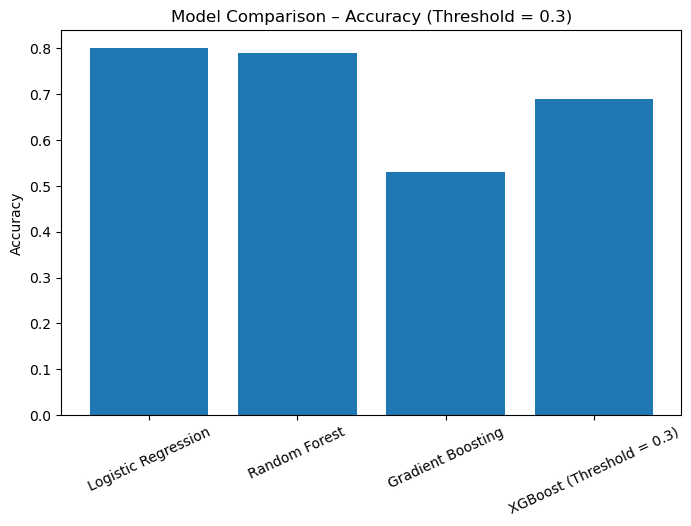

In [186]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df_compare["Model"], df_compare["Accuracy"])
plt.xticks(rotation=25)
plt.ylabel("Accuracy")
plt.title("Model Comparison – Accuracy (Threshold = 0.3)")
plt.show()

### RECALL VISUALIZATION 

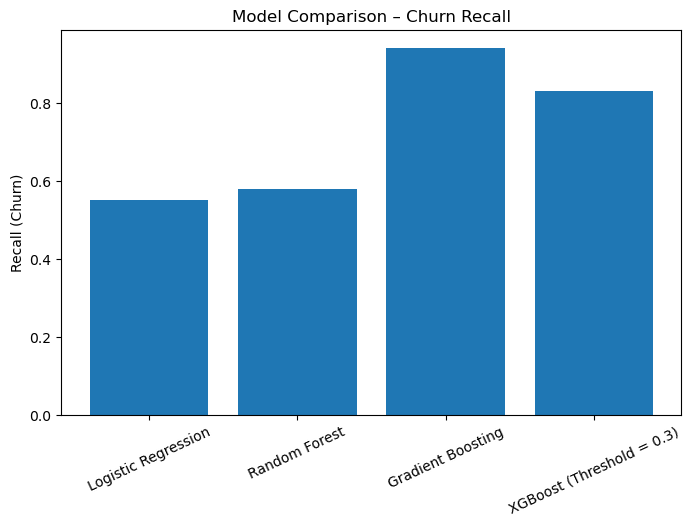

In [187]:
plt.figure(figsize=(8,5))
plt.bar(df_compare["Model"], df_compare["Recall (Churn = 1)"])
plt.xticks(rotation=25)
plt.ylabel("Recall (Churn)")
plt.title("Model Comparison – Churn Recall")
plt.show()

- Gradient Boosting → over-aggressive
- XGBoost → strong but controlled

## FEATURE IMPORTANCE (XGBoost)

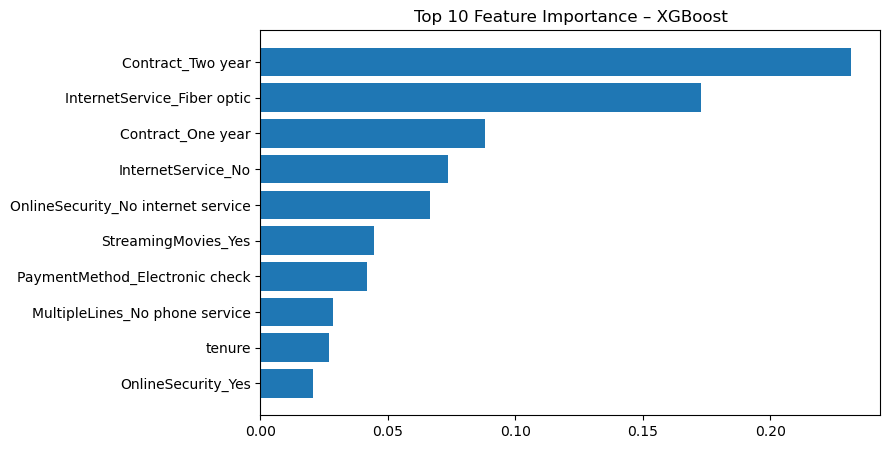

In [188]:
import matplotlib.pyplot as plt
import pandas as pd

importance = xgb_model.feature_importances_
features = X_train.columns

imp_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(imp_df["Feature"], imp_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importance – XGBoost")
plt.show()

### 🧠 Business Insight:
- Contract type
- MonthlyCharges
- Tenure
- InternetService

## ROC–AUC CURVE 

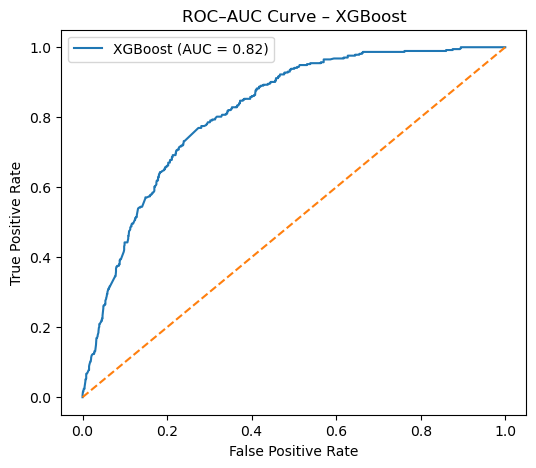

In [191]:
from sklearn.metrics import roc_curve, auc
# Probability
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve – XGBoost")
plt.legend()
plt.show()

📌 Expected:
- AUC ≈ 0.82–0.85
- Strong separability

## Final Conclusion

Multiple machine learning models were trained and evaluated for customer churn prediction.
Although Gradient Boosting achieved the highest recall, it produced a large number of false positives.
XGBoost with threshold tuning (0.3) provided the best balance between recall, precision, and accuracy.
Therefore, XGBoost was selected as the final model for deployment.